In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [7]:
import pandas as pd
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [5]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
df=df.drop(columns=["User ID","Gender"])

In [9]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [10]:
x=df.drop(columns=["Purchased"])
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
y=df.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

**Feature Scaling**

In [14]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [16]:
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split

In [32]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)


for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model


knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

K value  :  1  train score :  0.99375  cv score :  0.88125
K value  :  2  train score :  0.9375  cv score :  0.871875
K value  :  3  train score :  0.9375  cv score :  0.909375
K value  :  4  train score :  0.934375  cv score :  0.90625
K value  :  5  train score :  0.93125  cv score :  0.915625
K value  :  6  train score :  0.925  cv score :  0.90625
K value  :  7  train score :  0.925  cv score :  0.91875
K value  :  8  train score :  0.921875  cv score :  0.915625
K value  :  9  train score :  0.925  cv score :  0.915625
K value  :  10  train score :  0.921875  cv score :  0.9125
K value  :  20  train score :  0.9125  cv score :  0.903125
K value  :  50  train score :  0.909375  cv score :  0.890625


0.8875

In [33]:
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8875

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Making the Confusion Matrix**

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[42,  8],
       [ 1, 29]])

Text(42.0, 0.5, 'Truth')

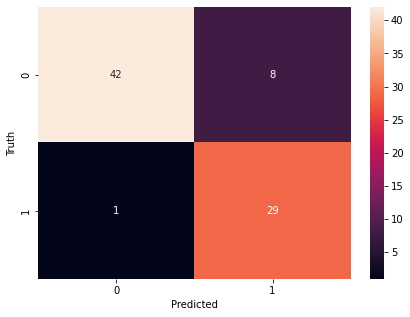

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')